In [1]:
#importing libaries
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv(r'C:\Users\pc\Downloads\Loan_train.csv')
data_test = pd.read_csv(r'C:\Users\pc\Downloads\Loan_test.csv')

In [3]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Visualizing the dataset will make use of two important libaries
#Matplot lib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
corr = data_train.corr()

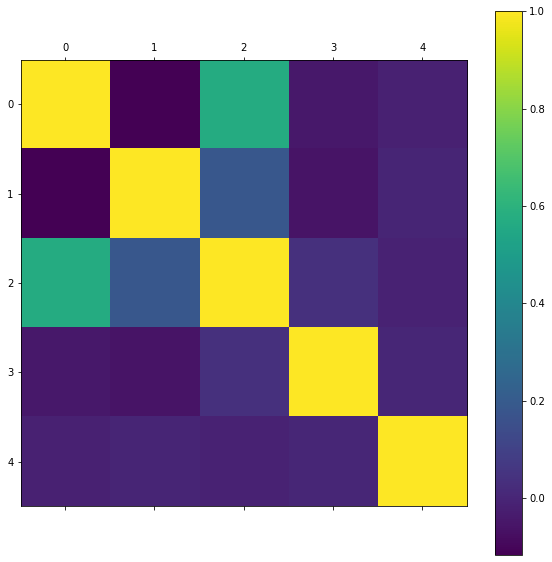

In [7]:
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(1,1,1)
caxes = axes.matshow(corr)
figure.colorbar(caxes)


In [8]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data_train.info(), data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

(None, None)

In [10]:
data_train.isnull().sum(), data_test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

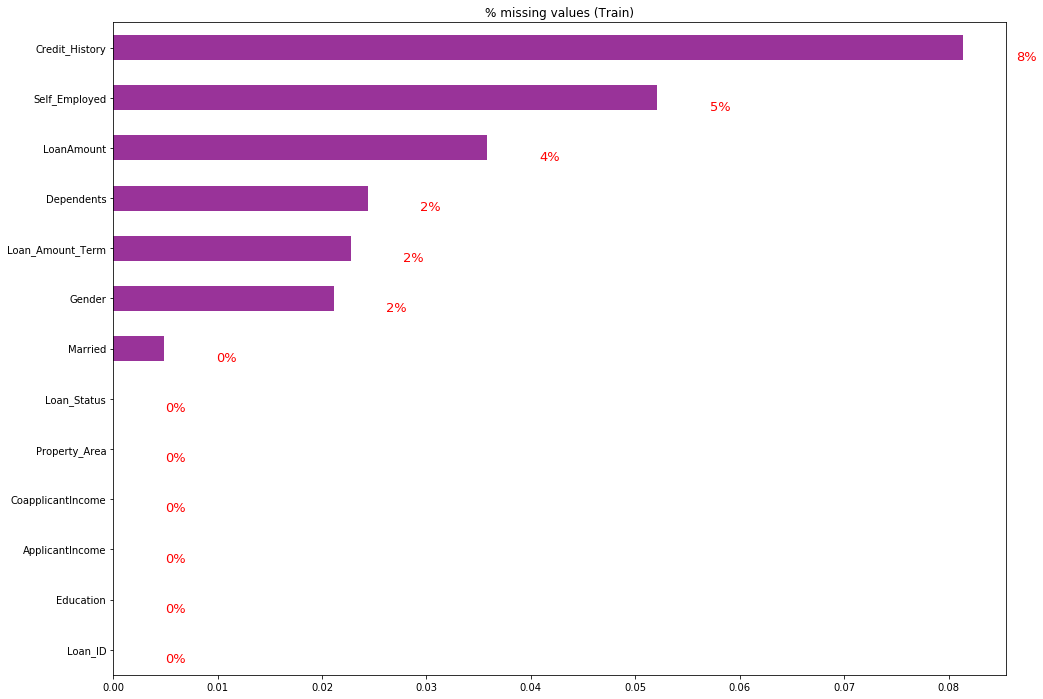

In [11]:
# A plot to check percentage of missing values for each column in the train data

ax_train = data_train.isna().sum().transform(lambda x:x/data_train.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Train)', color='purple', alpha=.8)
for i in ax_train.patches:
    ax_train.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='red', alpha=1)



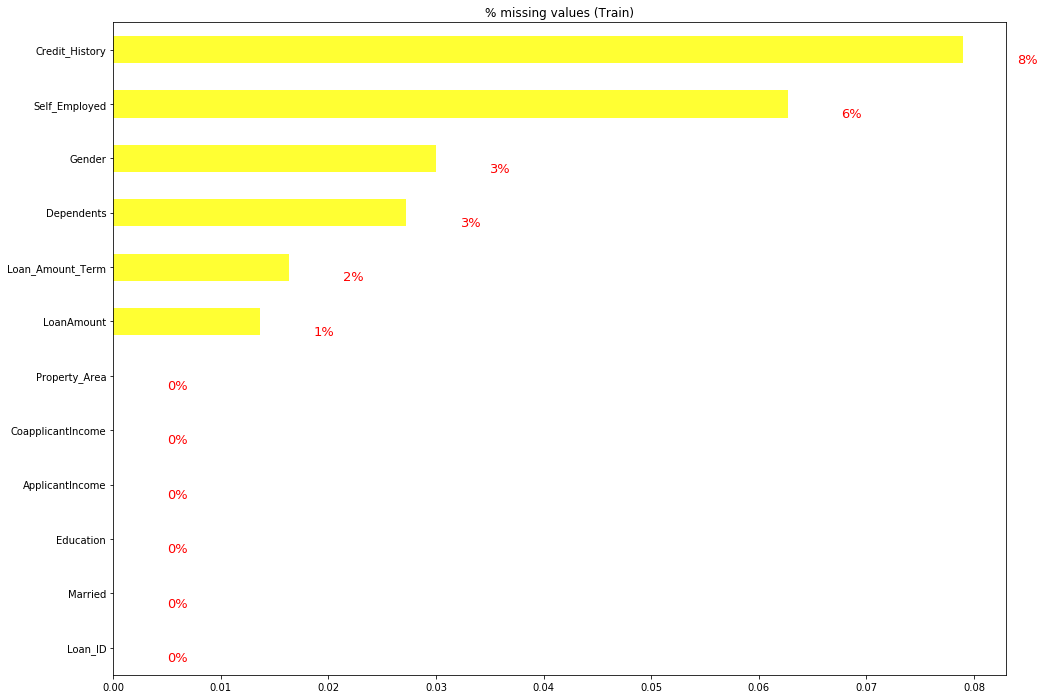

In [12]:
# A plot to check percentage of missing values for each column in the test data

ax_test = data_test.isna().sum().transform(lambda x:x/data_test.shape[0]).sort_values().plot.barh(figsize=(16, 12), title='% missing values (Train)', color='yellow', alpha=.8)
for i in ax_test.patches:
    ax_test.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(), 2)*100)) + '%', fontsize=13, color='red', alpha=1)



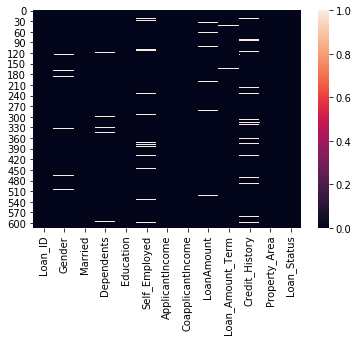

In [13]:
sns.heatmap(data_train.isnull())

In [14]:
x_axis=['ApplicantInsome']
y_axis = ['CoapplicantIncome']

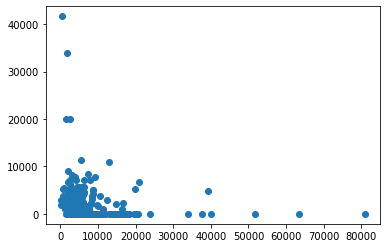

In [15]:
plt.scatter(data_train['ApplicantIncome'], data_train['CoapplicantIncome'])

In [16]:
new_df = pd.concat([data_train, data_test], sort=False, ignore_index=True)

In [17]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
new_df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

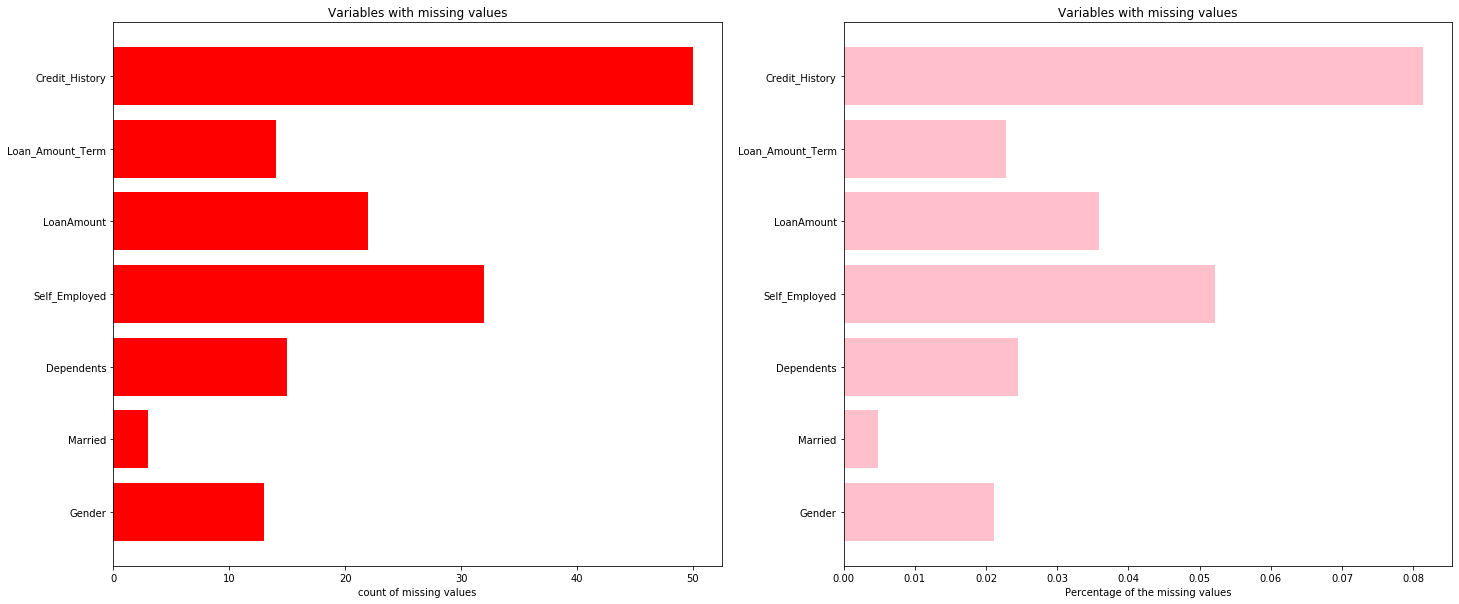

In [19]:
columns_with_missing_values = data_train.columns[data_train.isnull().any()]
data_train[columns_with_missing_values].isnull().sum()

#Visualizing the count and percentage of missing values

#to hold variable names
labels=[]
#to hold the counts of missing value of each values
valuecounts=[]
#to hold the percentage of the missing values
percentcount=[]

for col in columns_with_missing_values:
    labels.append(col)
    valuecounts.append(data_train[col].isnull().sum())
    #datat_rain.shape[0] will give the total row count
    percentcount.append(data_train[col].isnull().sum()/data_train.shape[0])
    
ind = np.arange(len(labels))
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (24,10))
rects = ax1.barh(ind, np.array(valuecounts), color = 'red')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation ='horizontal')
ax1.set_xlabel('count of missing values')
ax1.set_title('Variables with missing values')

#for the percentage
rests = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel('Percentage of the missing values')
ax2.set_title('Variables with missing values')


In [20]:
data = data_train.isnull()

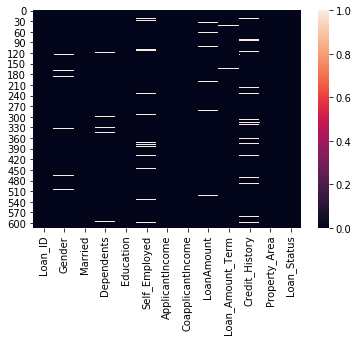

In [21]:
sns.heatmap(data)

Text(0.5, 1.0, 'Variables with missing values')

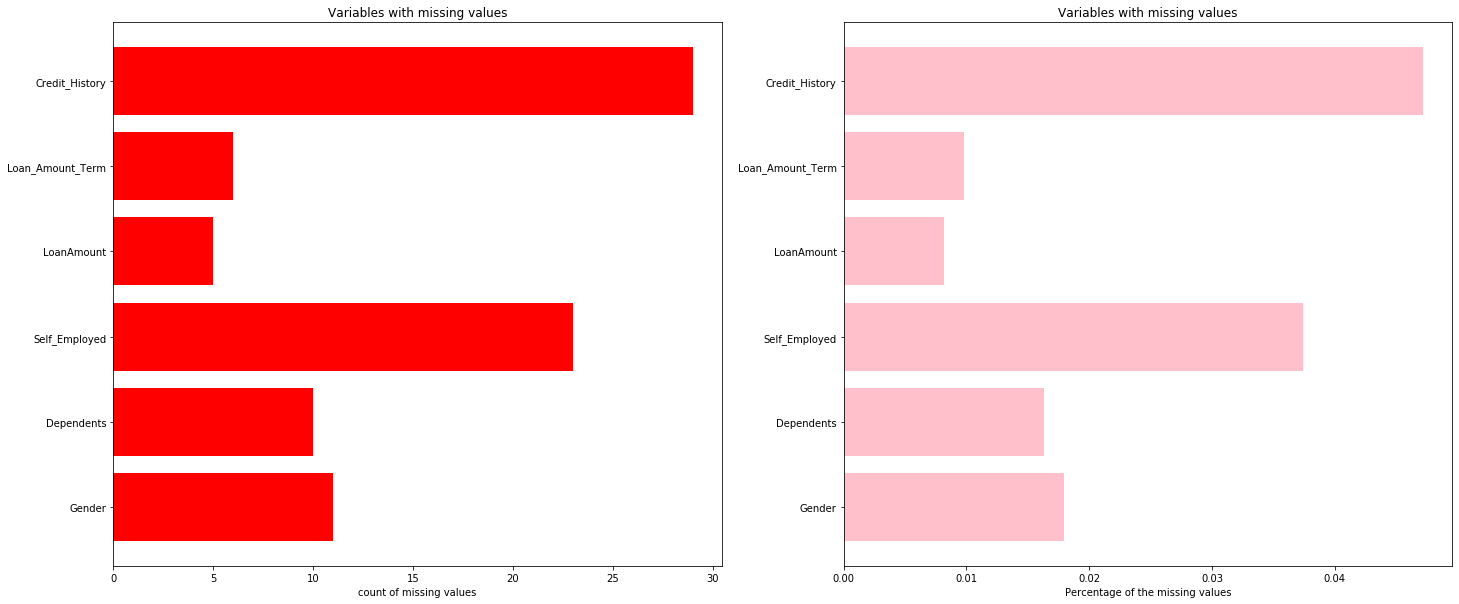

In [22]:
#Doing thesame for the test dataset
columns_with_missing_values = data_test.columns[data_test.isnull().any()]
data_test[columns_with_missing_values].isnull().sum()

#Visualizing the count and percentage of missing values

#to hold variable names
labels=[]
#to hold the counts of missing value of each values
valuecounts=[]
#to hold the percentage of the missing values
percentcount=[]

for col in columns_with_missing_values:
    labels.append(col)
    valuecounts.append(data_test[col].isnull().sum())
    #datat_rain.shape[0] will give the total row count
    percentcount.append(data_test[col].isnull().sum()/data_train.shape[0])
    
ind = np.arange(len(labels))
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (24,10))
rects = ax1.barh(ind, np.array(valuecounts), color = 'red')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation ='horizontal')
ax1.set_xlabel('count of missing values')
ax1.set_title('Variables with missing values')

#for the percentage
rests = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel('Percentage of the missing values')
ax2.set_title('Variables with missing values')


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve

In [24]:
# A function to print train and validation score and also return the validation score of a model
def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    print("Train AUC : {} \t Val AUC : {}".format(train_auc, test_auc))
    return test_auc

In [25]:
# Importing neccesary libraries for modelling

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from rgf import RGFClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [26]:
features = data_train.columns.drop(['Loan_ID', 'Loan_Status'])
X = pd.get_dummies( data_train[features])
X.fillna(-999, inplace=True)
y = data_train.Loan_Status

test_x = pd.get_dummies(data_test[features])
test_x.fillna(-999, inplace=True)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [28]:
# for seed value 64

preds, scores = [], []
 
seed = 64
 
Vc = VotingClassifier(estimators=[
('cat',  CatBoostClassifier(verbose=False, thread_count=-1, random_state=seed)), 
('rgf', RGFClassifier()), ("rgf1", RGFClassifier(algorithm="RGF_Sib")), ('cat1', CatBoostClassifier(bagging_temperature = 0.8609895558337871, border_count=116, depth=5, iterations=270, l2_leaf_reg=3, 
                         learning_rate=0.07085617391173239, random_strength=0.08820672130534879, random_state=seed, scale_pos_weight=0.390675124341283, verbose=False, thread_count=-1)), 
('rg',RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=seed)), ('rg1', RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=seed))], 
voting="soft", weights=[3, 1.5,1.5,1,1,1])
 
skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed) 
 
i = 30
for train_index, test_index in skf.split(X, y):
    print("Number of splits left {0} to train.".format(i))
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe = Pipeline([("SC", MinMaxScaler()), ("clf", Vc)])
    pipe.fit(x_train, y_train)
    score = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    scores.append(score) 
    pred = pipe.predict_proba(test_x)[:, 1]
    preds.append(pred)
    print(score)
    i -= 1
 
    np.mean(scores) #LB Score 0.84532655

Number of splits left 30 to train.
0.7333333333333334
Number of splits left 29 to train.
0.6333333333333333
Number of splits left 28 to train.
0.8673469387755103
Number of splits left 27 to train.
0.4387755102040816
Number of splits left 26 to train.
0.9693877551020409
Number of splits left 25 to train.
0.8775510204081632
Number of splits left 24 to train.
0.7755102040816326
Number of splits left 23 to train.
0.8673469387755102
Number of splits left 22 to train.
0.7244897959183674
Number of splits left 21 to train.
0.6428571428571429
Number of splits left 20 to train.
0.7959183673469388
Number of splits left 19 to train.
0.653061224489796
Number of splits left 18 to train.
0.8673469387755103
Number of splits left 17 to train.
0.489795918367347
Number of splits left 16 to train.
0.5476190476190477
Number of splits left 15 to train.
0.7857142857142857
Number of splits left 14 to train.
0.8214285714285714
Number of splits left 13 to train.
0.9047619047619049
Number of splits left 12 to tr

In [29]:
#Lemme try another method of voting for differnt classifiers
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
names = ['CatboostClassifier','LogisticRegression','DescisionTree','RandomForest']

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=100)
]
    

In [32]:
score = []
for name, clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    scores.append(score)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
score

0.8373983739837398